In [ ]:
!pip uninstall tensorflow


Found existing installation: tensorflow 2.8.2+zzzcolab20220629235552
Uninstalling tensorflow-2.8.2+zzzcolab20220629235552:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220629235552.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220629235552


In [ ]:
!pip install tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.7 kB/s 
     |████████████████████████████████| 5.8 MB 80.8 MB/s 
     |████████████████████████████████| 438 kB 71.3 MB/s 
     |████████████████████████████████| 1.6 MB 83.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
!pip install tensorflow-gpu==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.9 kB/s 


In [ ]:
!nvidia-smi 

Thu Jul 14 07:52:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np
import seaborn as sns

Mounted at /content/drive/


In [2]:
import tensorflow as tf

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
#from keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [6]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/train"
valid_path = "/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/validation"


In [7]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
Xception=tf.keras.applications.xception.Xception( 
                                                 weights='imagenet', 
                                                 include_top=False,
                                                 input_tensor=None, 
                                                 input_shape=IMAGE_SIZE + [3],
                                                 pooling=None, 
                                                 classes=2,
                                                 classifier_activation="softmax",)
#resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




83697664/83683744 [==============================] - 0s 0us/step


In [8]:
# don't train existing weights
for layer in Xception.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/train/*')

In [10]:
# our layers - you can add more if you want
x = Flatten()(Xception.output)

In [11]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=Xception.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip=True,rotation_range=90,rescale = 1./255)

test_datagen = ImageDataGenerator(horizontal_flip=True,rotation_range=90,rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/train",
                                                 target_size = (224, 224),
                                                 batch_size = 500,
                                                 class_mode = 'categorical')

Found 42210 images belonging to 2 classes.


In [19]:
#test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/validation",
                                            target_size = (224, 224),
                                            batch_size = 500,
                                            class_mode = 'categorical')

Found 9048 images belonging to 2 classes.


In [ ]:
#os.listdir(checkpoint_dir)
import os
#os.mkdir('/content/drive/MyDrive/Resnet Model/logs')
#os.mkdir('/content/drive/MyDrive/Xception Model/wgan Checkpoints')
os.mkdir('/content/drive/MyDrive/Xception Model/wgan Checkpoints/Training')

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [22]:
import tensorflow as tf
from tensorflow import keras
import os


checkpoint_path = ("/content/drive/MyDrive/Xception Model/Checkpoints/Training 2/weights-improvement-{epoch:02d}-fval_acc:.2f.hdf5")
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)
#stop_early = keras.callbacks.EarlyStopping(monitor='val_loss')

In [23]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks= [cp_callback]
)
model.save("/content/drive/MyDrive/Xception Model/model1_xception.h5")

Epoch 1/10
85/85 [==============================] - 13351s 157s/step - loss: 0.2093 - accuracy: 0.9792 - val_loss: 0.1107 - val_accuracy: 0.9938
Epoch 2/10
85/85 [==============================] - 5030s 59s/step - loss: 0.0644 - accuracy: 0.9919 - val_loss: 0.0494 - val_accuracy: 0.9944
Epoch 3/10
85/85 [==============================] - 5026s 59s/step - loss: 0.0489 - accuracy: 0.9932 - val_loss: 0.0542 - val_accuracy: 0.9947
Epoch 4/10
85/85 [==============================] - 5003s 59s/step - loss: 0.0432 - accuracy: 0.9933 - val_loss: 0.0506 - val_accuracy: 0.9941
Epoch 5/10
85/85 [==============================] - 5070s 60s/step - loss: 0.0532 - accuracy: 0.9925 - val_loss: 0.0546 - val_accuracy: 0.9867
Epoch 6/10
85/85 [==============================] - 5050s 59s/step - loss: 0.0548 - accuracy: 0.9924 - val_loss: 0.0695 - val_accuracy: 0.9842
Epoch 7/10
85/85 [==============================] - 5101s 60s/step - loss: 0.0468 - accuracy: 0.9927 - val_loss: 0.0528 - val_accuracy: 0.99

In [ ]:
from tensorflow.keras.models import load_model

R_MODEL_PATH = r'/content/drive/MyDrive/Xception Model/wgan_xception.h5'
#LOADING Generator
r = load_model(R_MODEL_PATH)


In [ ]:
#%tensorboard --logdir logs/fit

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/X History.csv')


0    0.1620
1    0.0821
2    0.0669
3    0.0818
4    0.0828
5    0.0822
6    0.0846
7    0.0656
8    0.0572
9    0.0829
Name: loss, dtype: float64

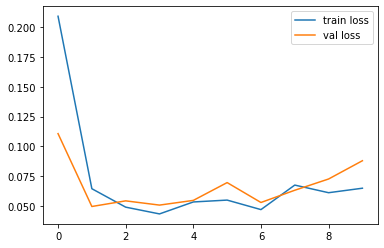

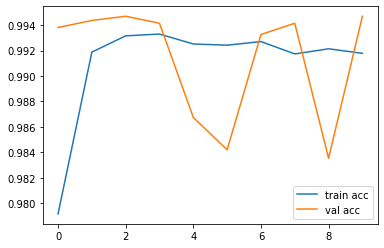

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

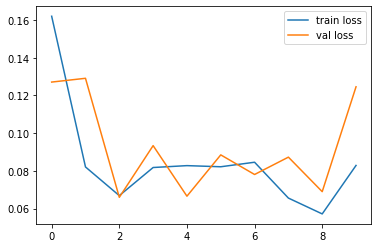

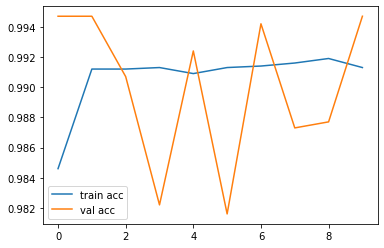

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(df['loss'], label='train loss')
plt.plot(df['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(df['accuracy'], label='train acc')
plt.plot(df['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/my_model.h5', custom_objects={'AlexNet': AlexNet})
#model=load_model('/content/drive/MyDrive/Resnet Model/model_resnet50.h5')
#model=load_model('/content/drive/MyDrive/Xception Model/model_xception.h5')

In [25]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Fyp Dataset (rar file extraction)/test',
                                            target_size = (227, 227),
                                            batch_size = 100,
                                            class_mode = 'categorical')

Found 9064 images belonging to 2 classes.


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['No Finding', 'Pneumonia']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[2316 2184]
 [2249 2315]]
Classification Report
              precision    recall  f1-score   support

  No Finding       0.51      0.51      0.51      4500
   Pneumonia       0.51      0.51      0.51      4564

    accuracy                           0.51      9064
   macro avg       0.51      0.51      0.51      9064
weighted avg       0.51      0.51      0.51      9064



In [28]:
cm=confusion_matrix(test_set.classes, y_pred)

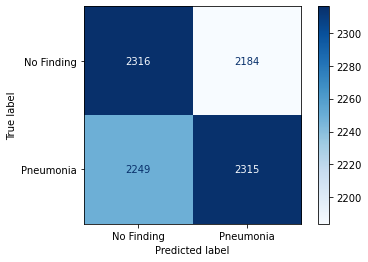

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_set, y_test)  
plt.show()

In [ ]:
a==1

In [ ]:
img_data

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError
import shutil 

path = Path("/content/drive/MyDrive/Fyp Dataset (rar file extraction)/test/P").rglob("*.png")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img)
            print(path+"/"+img_p)
            #shutil.move(path+"/"+img_p)
